# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.
# Carga el dataset
df = pd.read_csv("drug200.csv")
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# Visualiza el DataFrame
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
# Obten información de los datos.
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

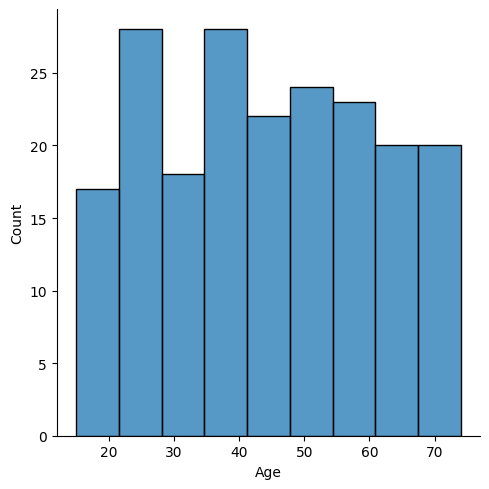

In [5]:
#Importa seaborn para tener gráficos más chidos 

#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen

#Crea un displot para de la edad (por ser una variable numérica)
import seaborn as sns
plt.figure(figsize=(9,5))
sns.displot(df["Age"])


In [6]:
# Género: cuenta cuántos hombres y mujeres hay
df["Sex"].value_counts()


Sex
M    104
F     96
Name: count, dtype: int64

Text(0.5, 1.0, 'Presión Sanguínea')

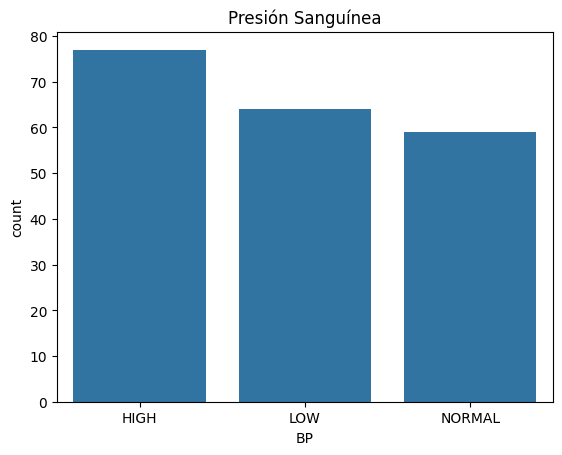

In [7]:
# Crea una gráfica de barras para Presión Sanguinea
sns.countplot(x="BP", data=df)
plt.title("Presión Sanguínea")


Text(0.5, 1.0, 'Colesterol')

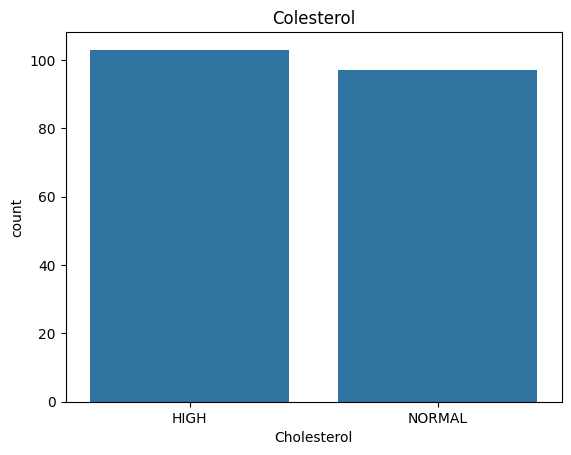

In [8]:
# Crea una gráfica de barras para Colesterol
sns.countplot(x="Cholesterol", data=df)
plt.title("Colesterol")


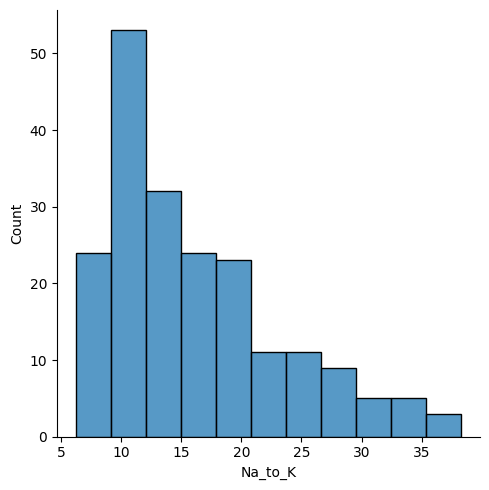

In [9]:
# Crea un displot para Sodio Potasio
sns.displot(df["Na_to_K"])


Text(0.5, 1.0, 'Medicamentos')

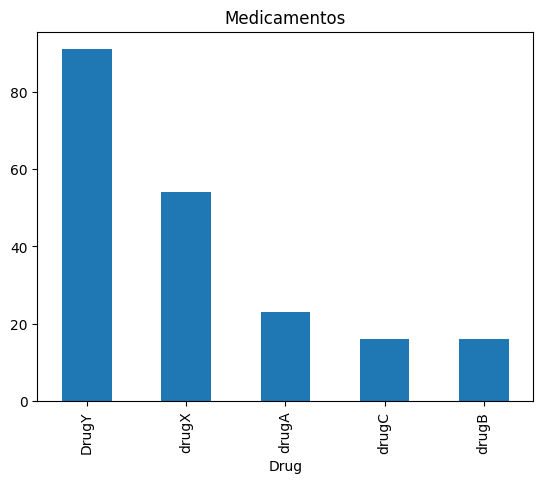

In [10]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

#Cuenta los medicamentos
df["Drug"].value_counts().plot(kind='bar')
plt.title("Medicamentos")


***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


<Axes: xlabel='Drug', ylabel='Age'>

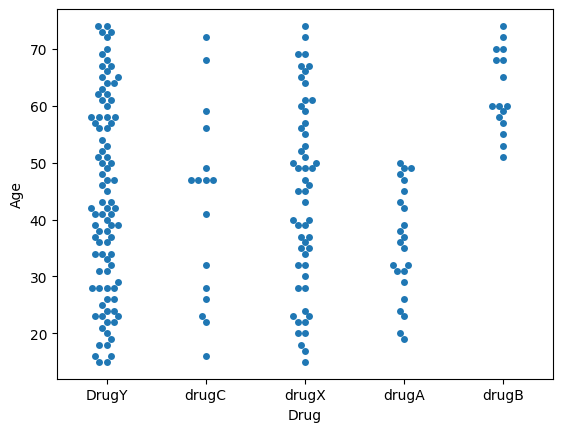

In [11]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
sns.swarmplot(x="Drug", y="Age", data=df)


<Axes: xlabel='Sex'>

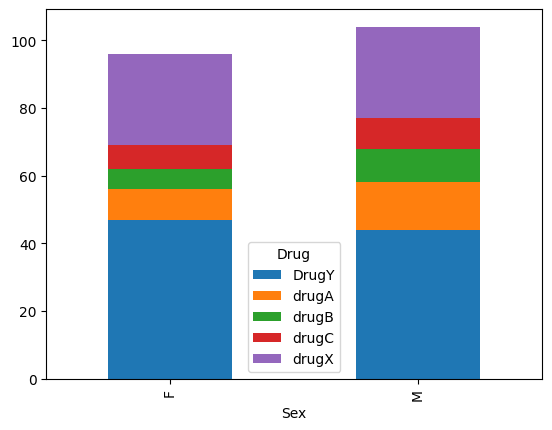

In [12]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas

#Grafica la tablita anterior con una gráfica de barras
pivot = df.groupby(['Sex', 'Drug']).size().unstack()
pivot.plot(kind='bar', stacked=True)


<Axes: xlabel='BP'>

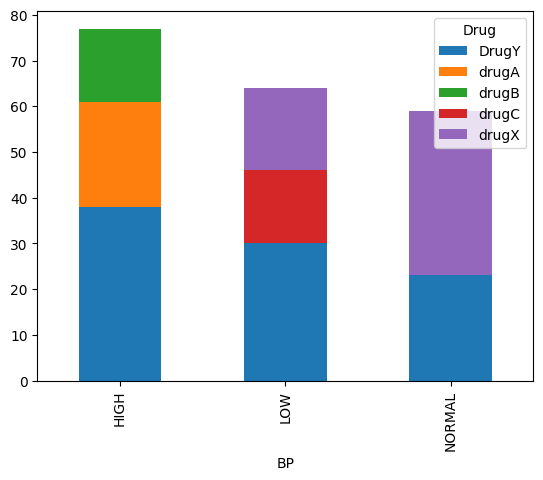

In [13]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
pivot = df.groupby(['BP', 'Drug']).size().unstack()
pivot.plot(kind='bar', stacked=True)


<Axes: xlabel='Cholesterol'>

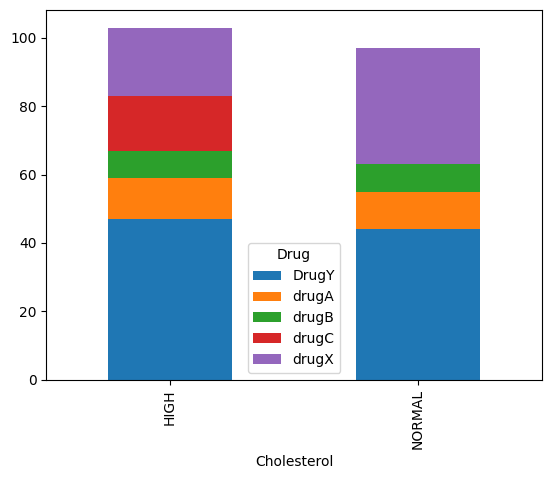

In [14]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
pivot = df.groupby(['Cholesterol', 'Drug']).size().unstack()
pivot.plot(kind='bar', stacked=True)


<Axes: xlabel='Drug', ylabel='Na_to_K'>

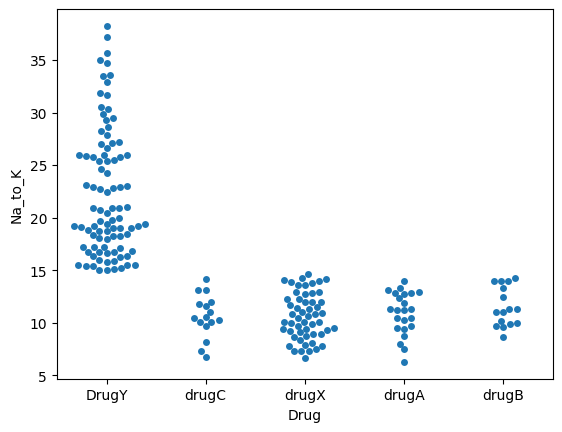

In [15]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
sns.swarmplot(x="Drug", y="Na_to_K", data=df)


***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [16]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc

from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()

df["Sex_n"] = le_sex.fit_transform(df["Sex"])
df["BP_n"] = le_bp.fit_transform(df["BP"])
df["Chol_n"] = le_chol.fit_transform(df["Cholesterol"])


In [17]:
# Crear set de entrenamiento y set de prueba
from sklearn.model_selection import train_test_split
X = df[["Age", "Sex_n", "BP_n", "Chol_n", "Na_to_K"]]
y = df["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [18]:
## Crear modelo para medicamento
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)


SGDClassifier(random_state=42)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [19]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)



In [19]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([X.iloc[0]])


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['DrugY'], dtype='<U5')

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [20]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X, y, cv=5, scoring="accuracy")


array([0.6  , 0.625, 0.675, 0.6  , 0.55 ])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [21]:
# Modelo que nunca es Y
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)


0.375

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [22]:
# Matriz de confusión
#Importar cross_val_predict 

#Importar confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(sgd, X, y, cv=5)
confusion_matrix(y, y_pred)


array([[73,  4,  4,  0, 10],
       [10,  6,  4,  0,  3],
       [ 0,  3,  7,  0,  6],
       [ 3,  0,  5,  0,  8],
       [12,  1,  5,  0, 36]])

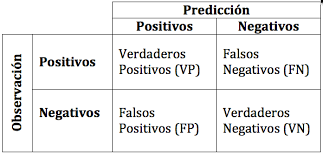

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [23]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
precision_score(y, y_pred, average='macro'), recall_score(y, y_pred, average='macro')


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.4049795918367347, 0.43344680681637204)

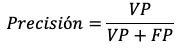

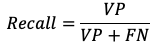

In [24]:
#Cambiar de clasificador
#Importar RandomForestClassifier

#Hacer la matriz de confusión otra vez
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
y_pred_forest = forest.predict(X_test)
confusion_matrix(y_test, y_pred_forest)
precision_score(y_test, y_pred_forest, average='macro'), recall_score(y_test, y_pred_forest, average='macro')


(1.0, 1.0)

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_forest, average='macro')
#Calcular F1


1.0

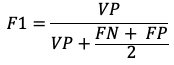

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [28]:
#Puntación de un paciente aleatorio
forest.predict([X.iloc[10]])


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['drugC'], dtype=object)

In [29]:
#Graficar la precisión y recall 

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd, X, y, cv=3, method="decision_function")
y_scores[:5]


array([[ 6.54602105e+03, -1.03055235e+03, -1.14349123e+04,
        -4.29923838e+03, -8.36907740e+03],
       [ 1.73370208e+03, -9.04307686e+02, -4.67705718e+03,
        -2.40804592e+03, -4.30703193e+03],
       [ 7.79547659e+02, -7.56114852e+02, -3.20336625e+03,
        -1.91011881e+03, -3.38431632e+03],
       [ 1.05428077e+01, -1.23396172e+03, -3.68039165e+03,
        -1.15620235e+03, -7.25447400e+02],
       [ 3.29051816e+03, -1.39925139e+03, -6.38237813e+03,
        -3.39977883e+03, -6.29922161e+03]])

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [30]:
#Supon que ya lo pensaste y querías un umbral  90 
threshold = 0.9
# Aquí debes decidir el score mínimo para tomar la predicción según el modelo, depende del valor obtenido.


In [31]:
#Arroja la precisión y recall para un umbral de 90
from sklearn.metrics import roc_curve
# El modelo sgd no es binario, se requiere OneVsRestClassifier o similar


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [32]:
#Importar roc_curve
from sklearn.metrics import roc_curve


In [33]:
#Graficar la curva ROC

#Poner una cuadrícula
from sklearn.metrics import roc_auc_score
# Nota: como son múltiples clases, usa average='macro'
roc_auc_score(y_test, forest.predict_proba(X_test), multi_class='ovr', average='macro')


np.float64(1.0)

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [39]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
# Nota: como son múltiples clases, usa average='macro'
roc_auc_score(y_test, forest.predict_proba(X_test), multi_class='ovr', average='macro')


np.float64(1.0)

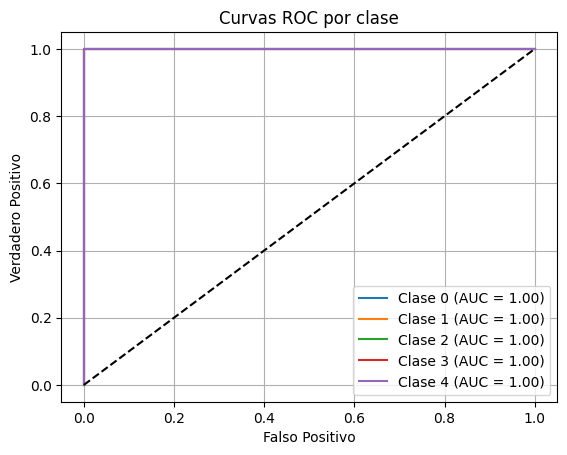

In [40]:
#Compararlo con el modelo de random forest
# Promedio del AUC de todas las clases
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarizar las etiquetas para curva ROC multiclase
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Entrenar modelo para curva ROC
forest.fit(X_train, y_train)
y_score = forest.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calcular fpr, tpr y roc_auc para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar curva ROC para cada clase
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curvas ROC por clase')
plt.legend()
plt.grid()
plt.show()


In [41]:
#Graficar la curva ROC y la predicción de random forest 
from sklearn.svm import SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [42]:
#Calcular el puntaje (área bajo la curva) de random forest  
svc.predict([X.iloc[5]])


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['drugX'], dtype=object)

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [43]:
# Importar SVC=Support Vector Classifier



#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svc.decision_function([X.iloc[5]])


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 3.15893685,  2.20087729, -0.27654065,  0.8006977 ,  4.26569779]])

In [44]:
#Utilizar decision_function para observar los puntajes de cada medicina 

#Decidirá por el qué tenga mayor puntaje
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(probability=True, random_state=42))
ovr_clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=SVC(probability=True, random_state=42))

In [45]:
#Ahora, utiliza el clasificador multiclase 

#Predecir a un humano ahora con este clasificador
ovr_clf.predict([X.iloc[5]])


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py

array(['drugX'], dtype='<U5')

In [46]:
#Utilizar decision_function para observar los puntajes de cada medicina 
ovr_clf.decision_function([X.iloc[5]])


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py

array([[-1.2144175 , -1.00180493, -1.11317143, -1.0002494 , -0.64360526]])

In [47]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.decision_function([X.iloc[5]])


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-1100.34593208, -3101.91087346, -4716.16750508, -2675.70266274,
         1542.82888413]])

***

## <span style="color:green">8. Analizar Errores</span>

In [35]:
#Hacer un clasificador de random forest
forest2 = RandomForestClassifier(random_state=1)
forest2.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

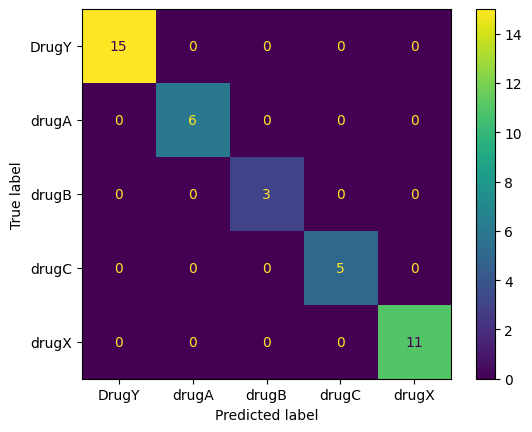

In [36]:
#Utilizar la matriz de confusión 
from sklearn.metrics import ConfusionMatrixDisplay
y_pred2 = forest2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()


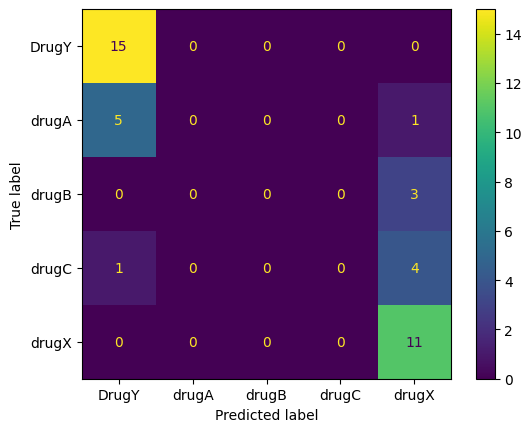

In [37]:
#utilizar ahora SGD
y_pred_sgd = sgd.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sgd)
plt.show()
